In [164]:
import tensorflow as tf
import numpy as np
import os
import cv2
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras import optimizers
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
keras.__version__

'2.3.1'

In [214]:
width = 150
height = 150

In [215]:
base_dir = "/Users/joannakang/Desktop/study/CatsandDogs"

In [216]:
test_dir = os.path.join(base_dir, "test")
train_dir = os.path.join(base_dir, "train")

In [217]:
class_name = os.listdir(test_dir)

In [218]:
print (class_name)

['dogs', 'cats', '.DS_Store']


In [219]:
class_name.remove('.DS_Store')

In [220]:
train_image = []
train_label = []

In [221]:
test_image = []
test_label = []

In [222]:
val_image = []
val_label = []

In [223]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(class_name)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

[[0. 1.]
 [1. 0.]]


/Users/joannakang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [224]:
for i in range(len(class_name)):
    path = os.path.join(train_dir, class_name[i])
    img_list = os.listdir(path)
    for j in img_list:
        img = os.path.join(path, j)
        img = cv2.imread(img, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (width, height), interpolation = cv2.INTER_CUBIC) #interporlation = 공백값을 어떻게 메울 것인가, inter cubic : 주변의 평균값으로 맞춘다
        img = img.reshape((width, height, 3)) #reshape = 데이터의 차원을 맞춰주는 것 (흑백은 흑백의 형태로 ??)
        train_image.append(img)
        train_label.append(onehot_encoded[i])

In [225]:
for i in range(len(class_name)):
    path = os.path.join(test_dir, class_name[i])
    img_list = os.listdir(path)
    for j in img_list: 
        img = os.path.join(path,j)
        img = cv2.imread(img, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (width, height), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((width, height, 3))
        test_image.append(img)
        test_label.append(onehot_encoded[i])        

In [226]:
for i in range(len(class_name)):
    path = os.path.join(test_dir, class_name[i])
    img_list = os.listdir(path)
    for j in img_list: 
        img = os.path.join(path,j)
        img = cv2.imread(img, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (width, height), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((width, height, 3))
        val_image.append(img)
        val_label.append(onehot_encoded[i])   

In [227]:
print(len(train_image))
print(len(train_label))
print(len(test_image))
print(len(test_label))
print(len(val_image))
print(len(val_label))

200
200
28
28
28
28


In [228]:
train_image, val_image, train_label, val_label = train_test_split(train_image, train_label, test_size=0.33, random_state=42)

In [246]:
train_image = np.array(train_image)
train_label = np.array(train_label)
test_image = np.array(test_image)
test_label = np.array(test_label)
val_image = np.array(val_image)
val_label = np.array(val_label)
print(train_image.shape)
print(val_image.shape)
print(test_image.shape)

(134, 150, 150, 3)
(66, 150, 150, 3)
(28, 150, 150, 3)


In [247]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation = 'relu', input_shape = (150, 150, train_image.shape[3])))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(34, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(train_label.shape[1], activation = 'softmax'))

In [248]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 34)        19618     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 34)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 32)        9824      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9248)             

In [249]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [250]:
loss_type = 'mean_squared_error', 'binary_crossentropy', 'categorical_crossentropy'

In [251]:
history = model.fit(x = train_image, y = train_label, validation_data = (val_image, val_label), batch_size = 5, epochs = 10)

Train on 134 samples, validate on 66 samples
Epoch 1/10
134/134 [==============================] - 4s 29ms/step - loss: 1.6510 - accuracy: 0.5373 - val_loss: 0.8770 - val_accuracy: 0.4697
Epoch 2/10
134/134 [==============================] - 3s 25ms/step - loss: 0.6213 - accuracy: 0.6567 - val_loss: 0.7594 - val_accuracy: 0.5152
Epoch 3/10
134/134 [==============================] - 3s 25ms/step - loss: 0.4580 - accuracy: 0.7836 - val_loss: 2.0256 - val_accuracy: 0.5303
Epoch 4/10
134/134 [==============================] - 3s 25ms/step - loss: 0.9065 - accuracy: 0.7463 - val_loss: 1.0700 - val_accuracy: 0.4697
Epoch 5/10
134/134 [==============================] - 3s 25ms/step - loss: 0.4015 - accuracy: 0.8134 - val_loss: 1.0481 - val_accuracy: 0.5000
Epoch 6/10
134/134 [==============================] - 3s 25ms/step - loss: 0.3327 - accuracy: 0.8284 - val_loss: 1.8495 - val_accuracy: 0.4697
Epoch 7/10
134/134 [==============================] - 3s 25ms/step - loss: 0.2063 - accuracy: 0.9

In [252]:
loss_and_accuracy = model.evaluate(x = test_input, y = test_label)
print(loss_and_accuracy)

28/28 [==============================] - 0s 9ms/step
[0.3356654644012451, 0.8214285969734192]


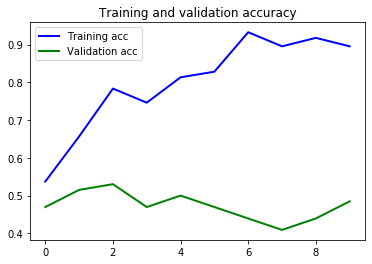

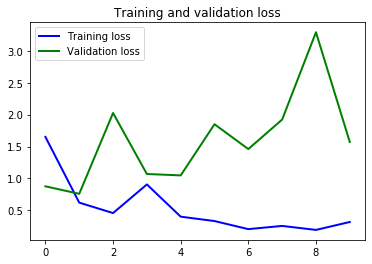

In [253]:
plt.rcParams['lines.linewidth'] = 2

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()